In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import en_core_web_md
import csv
import regex as re
import os
import spacy
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel
from gensim import corpora
import pprint

import pyLDAvis.gensim_models
pyLDAvis.enable_notebook() #Notebook visualisation enabled

In [2]:
path = './Data/DataUCSB/'
list_of_files = []

for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.txt'):
            list_of_files.append(os.path.join(root,file))

len(list_of_files)

/home/muddy/.local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


136

In [3]:
filepath = './Data/DataUCSB/address-before-joint-session-the-congress-the-state-the-union-16.csv'
speeches = []
for file in list_of_files:
    with open(file) as f:
        text = f.read()
    speeches.append(text)

/home/muddy/.local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<A HREF="https://regexr.com/">RegExr regex tester</A>

In [4]:
#Load SpaCy English Model
nlp = en_core_web_md.load()

#Tags to remove
extags = ['PRON','CCONJ','PUNCT','PART','DET','ADP','NUM','SYM','SPACE']

tokens=[]
#SpaCy tokenization + lemmatization + lowercase
for speech in nlp.pipe(speeches):
    scr_tok = [token.lemma_.lower() for token in speech if token.pos_ not in extags and not token.is_stop and token.is_alpha]
    tokens.append(scr_tok)
#tokens
# example output:
# [['thank', 'good', 'afternoon', 'thank', ...

/home/muddy/.local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/muddy/.local/lib/python3.9/site-packages/spacy/language.py:1895: UserWarning: [W123] Argument disable with value [] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(


In [5]:
#nlp = spacy.load("en_core_web_lg")
#doc = [nlp(speech) for speech in speeches]

/home/muddy/.local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
#Tags to remove
#extags = ['PRON','CCONJ','PUNCT','PART','DET','ADP','NUM','SYM','SPACE']
#tokens = [ (token.lemma_.lower() for token in speech if token.pos_ not in extags and not token.is_stop and token.is_alpha) for speech in speeches ]

dictionary = Dictionary(tokens)
#dictionary.filter_extremes(no_below=10, no_above=0.5)
#Convert token counts into bag of words (BoW) corpus
corpus = [dictionary.doc2bow(token) for token in tokens]

/home/muddy/.local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
corpus

/home/muddy/.local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 2),
  (1, 1),
  (2, 2),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 2),
  (8, 2),
  (9, 1),
  (10, 8),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 2),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 3),
  (19, 12),
  (20, 9),
  (21, 9),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 2),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 2),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 2),
  (49, 1),
  (50, 3),
  (51, 5),
  (52, 1),
  (53, 5),
  (54, 1),
  (55, 3),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 3),
  (60, 1),
  (61, 1),
  (62, 3),
  (63, 1),
  (64, 2),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 2),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 2),
  (83, 1),
  (84, 3),
  (85, 3),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1

In [8]:
# Make a index to word dictionary.

temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

#Train the topic model

model = LdaModel(corpus=corpus, id2word=id2word,iterations=400, num_topics=6)
top_topics = model.top_topics(corpus)
top_topics

/home/muddy/.local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[([(0.008121795, 'year'),
   (0.008009852, 'people'),
   (0.0076610767, 'go'),
   (0.0075984914, 'know'),
   (0.007422068, 'work'),
   (0.0061846757, 'america'),
   (0.0059937136, 'time'),
   (0.0059771906, 'country'),
   (0.0058135805, 'want'),
   (0.005329522, 'president'),
   (0.004866912, 'right'),
   (0.004815544, 'come'),
   (0.0046263793, 'need'),
   (0.0046238056, 'today'),
   (0.0044729435, 'job'),
   (0.0041540368, 'american'),
   (0.0041190456, 'think'),
   (0.0040220185, 'thank'),
   (0.0039481395, 'way'),
   (0.0038161164, 'law')],
  -0.22625303058472945),
 ([(0.013456224, 'people'),
   (0.00827318, 'work'),
   (0.0069471085, 'america'),
   (0.0065607666, 'country'),
   (0.0065075676, 'year'),
   (0.005905604, 'right'),
   (0.0057191607, 'new'),
   (0.0054608053, 'american'),
   (0.0052729635, 'world'),
   (0.0049228207, 'job'),
   (0.0046524312, 'nation'),
   (0.0045128837, 'know'),
   (0.0044928933, 'americans'),
   (0.004402455, 'time'),
   (0.0043480517, 'good'),
   (0

In [9]:
#Construct and train unsupervised LDA model + Determine optimal amount of topics
umtopics, umscore = [], []
cvtopics, cvscore = [], []
#Compute coherence score using C_umass:
for i in range(1,20,1):
    model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=i, workers=4, passes=10, random_state=47)
    #LdamultiCore uses multiple cores to speed up model training, use with caution if you have a weaker PC! (Find your max number of cores with ctrl+shift+esc, under CPU)
    cm = CoherenceModel(model=model, corpus=corpus, dictionary=dict, coherence='u_mass')

    umtopics.append(i)
    umscore.append(cm.get_coherence())
#Compute coherence score using C_v: 
for i in range (1,20,1):
    model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=47)
    cm = CoherenceModel(model=model, texts = tokens, corpus=corpus, dictionary=dict, coherence='c_v')

    cvtopics.append(i)
    cvscore.append(cm.get_coherence())
#The difference in coherence score measures is the method in which the text is segmented and probability is calculated


/home/muddy/.local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: type object 'dict' has no attribute 'id2token'

In [10]:
umtopics

/home/muddy/.local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [11]:
umscore

/home/muddy/.local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[-0.21023558230164718,
 -0.30705467810819453,
 -0.470978948208991,
 -0.4364726391013689,
 -0.9653234580412603,
 -0.7573451556518305,
 -0.7288955560977742,
 -0.6253589182021456,
 -0.9021804960353994,
 -0.8093105904627238,
 -0.5951266047194755,
 -0.8247730870349302,
 -0.6316004095207006,
 -0.8478857529476017,
 -0.966333674454995,
 -0.8300220997153289,
 -0.8399150746415499,
 -0.8258038748760537,
 -0.7751123104241052]

/home/muddy/.local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


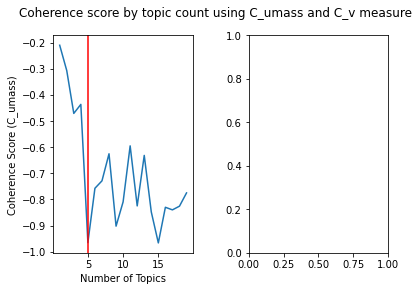

In [13]:
#Adjustable threshold for visualising with red vertical lines
threshold=5
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Coherence score by topic count using C_umass and C_v measure')
fig.subplots_adjust(wspace=0.4)

ax1.plot(umtopics,umscore)
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('Coherence Score (C_umass)')
ax1.axvline(x=threshold,c='red')

#ax2.plot(cvtopics,cvscore)
#ax2.set_xlabel('Number of Topics')
#ax2.set_ylabel('Coherence Score (C_v)')
#ax2.axvline(x=threshold,c='red')
#For both scores, higher values are better. Choice of topic count is subjective, but both scores must be taken into account.
plt.show()

In [14]:
#Construct final model with 5 topics (Increase iterations and passes because it is the final model)
finalmodel = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=5, workers = 4, passes=100, random_state=47)

finalmodel.print_topics()

/home/muddy/.local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.011*"people" + 0.008*"president" + 0.007*"know" + 0.007*"right" + 0.007*"today" + 0.007*"law" + 0.006*"go" + 0.006*"work" + 0.006*"country" + 0.006*"year"'),
 (1,
  '0.016*"order" + 0.013*"shall" + 0.011*"states" + 0.010*"united" + 0.009*"section" + 0.009*"agency" + 0.008*"review" + 0.008*"law" + 0.007*"department" + 0.007*"executive"'),
 (2,
  '0.011*"president" + 0.010*"mr" + 0.009*"ukraine" + 0.008*"certificate" + 0.008*"q" + 0.007*"issue" + 0.007*"people" + 0.007*"international" + 0.007*"birth" + 0.006*"question"'),
 (3,
  '0.013*"people" + 0.009*"world" + 0.008*"united" + 0.008*"country" + 0.007*"states" + 0.007*"america" + 0.006*"nation" + 0.006*"work" + 0.005*"security" + 0.005*"war"'),
 (4,
  '0.010*"year" + 0.009*"work" + 0.009*"job" + 0.007*"new" + 0.007*"people" + 0.007*"america" + 0.007*"go" + 0.006*"know" + 0.006*"business" + 0.006*"economy"')]

In [15]:
lda_display = pyLDAvis.gensim_models.prepare(finalmodel, corpus, dictionary)
pyLDAvis.display(lda_display)

/home/muddy/.local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/muddy/.local/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
